# EDA
## Vivienda en Madrid

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\Documentos\2.CURSOS\BOOTCAMP\DS_PT_09_2023\EDA\Madrid_real_state\houses_Madrid.csv', index_col='Unnamed: 0')
data = data.sort_index(axis= 1)

Eliminación de las columnas que son nulas o no aportan información relevante al análisis

In [3]:
data.columns

Index(['are_pets_allowed', 'built_year', 'buy_price', 'buy_price_by_area',
       'door', 'energy_certificate', 'floor', 'has_ac', 'has_balcony',
       'has_central_heating', 'has_fitted_wardrobes', 'has_garden',
       'has_green_zones', 'has_individual_heating', 'has_lift', 'has_parking',
       'has_pool', 'has_private_parking', 'has_public_parking',
       'has_storage_room', 'has_terrace', 'house_type_id', 'id',
       'is_accessible', 'is_buy_price_known', 'is_exact_address_hidden',
       'is_exterior', 'is_floor_under', 'is_furnished', 'is_kitchen_equipped',
       'is_new_development', 'is_orientation_east', 'is_orientation_north',
       'is_orientation_south', 'is_orientation_west',
       'is_parking_included_in_price', 'is_renewal_needed',
       'is_rent_price_known', 'latitude', 'longitude', 'n_bathrooms',
       'n_floors', 'n_rooms', 'neighborhood_id', 'operation', 'parking_price',
       'portal', 'raw_address', 'rent_price', 'rent_price_by_area',
       'sq_mt_allot

In [4]:
def nombre_columnas(df):
    '''Función para tratar el nombre de las columnas y eliminar las vacias'''
    try:
        df.drop(columns=['latitude', 'longitude', 'portal', 'door', 'rent_price_by_area', 'are_pets_allowed', 'is_furnished',
                    'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'sq_mt_useful', 'n_floors', 'has_ac',
                    'sq_mt_allotment', 'raw_address', 'is_exact_address_hidden', 'street_name', 'street_number', 'is_buy_price_known',
                    'is_parking_included_in_price', 'is_rent_price_known', 'operation', 'is_new_development', 'parking_price', 'rent_price', 
                    'has_central_heating', 'has_individual_heating'
                    ], axis=1, inplace = True)
        
        df.columns = ['annio_construccion', 'precio_compra', 'precio_compra_por_area', 'cee',
       'piso', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes', 'ascensor', 
       'estacionamiento', 'pileta',
       'trastero', 'terraza', 'tipo_inmueble', 'id',
       'accesible', 'exterior', 'bajo',
       'orientacion_este', 'orientacion_norte', 'orientacion_sur',
       'orientacion_oeste', 'necesita_reforma', 'bannos', 'habitaciones',
       'barrio_id', 'metros_cuadrados', 'ubicacion', 'anuncio']
    except Exception as a:
        print(f"No pude tranformar las columnas por {a}")
    return df

In [5]:
df = nombre_columnas(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annio_construccion      10000 non-null  float64
 1   precio_compra           21742 non-null  int64  
 2   precio_compra_por_area  21742 non-null  int64  
 3   cee                     21742 non-null  object 
 4   piso                    19135 non-null  object 
 5   balcon                  3321 non-null   object 
 6   armarios_empotrados     13399 non-null  object 
 7   jardin                  1556 non-null   object 
 8   zonas_verdes            4057 non-null   object 
 9   ascensor                19356 non-null  object 
 10  estacionamiento         21742 non-null  bool   
 11  pileta                  5171 non-null   object 
 12  trastero                7698 non-null   object 
 13  terraza                 9548 non-null   object 
 14  tipo_inmueble           21351 non-null  obj

## Analisis Univariante

##### Variables Cuantitativas

In [7]:
df_cuant = df.filter(['annio_construccion', 'precio_compra', 'precio_compra_por_area', 'bannos', 'habitaciones', 'metros_cuadrados'], axis=1)
df_cuant.describe()

,annio_construccion,precio_compra,precio_compra_por_area,bannos,habitaciones,metros_cuadrados
count,10000.000000,2.174200e+04,21742.000000,21726.000000,21742.000000,21616.000000
mean,1970.046400,6.537356e+05,4020.523871,2.091687,3.005749,146.920892
std,69.386705,7.820821e+05,1908.418774,1.406992,1.510497,134.181865
min,1723.000000,3.600000e+04,447.000000,1.000000,0.000000,13.000000
25%,1957.000000,1.980000e+05,2551.000000,1.000000,2.000000,70.000000
50%,1970.000000,3.750000e+05,3720.000000,2.000000,3.000000,100.000000
75%,1994.000000,7.636000e+05,5000.000000,2.000000,4.000000,162.000000
max,8170.000000,8.800000e+06,18889.000000,16.000000,24.000000,999.000000


In [8]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h');
            plt.show()

            sns.displot(data[columna]);
            plt.show()

            print(data[columna].describe())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: annio_construccion



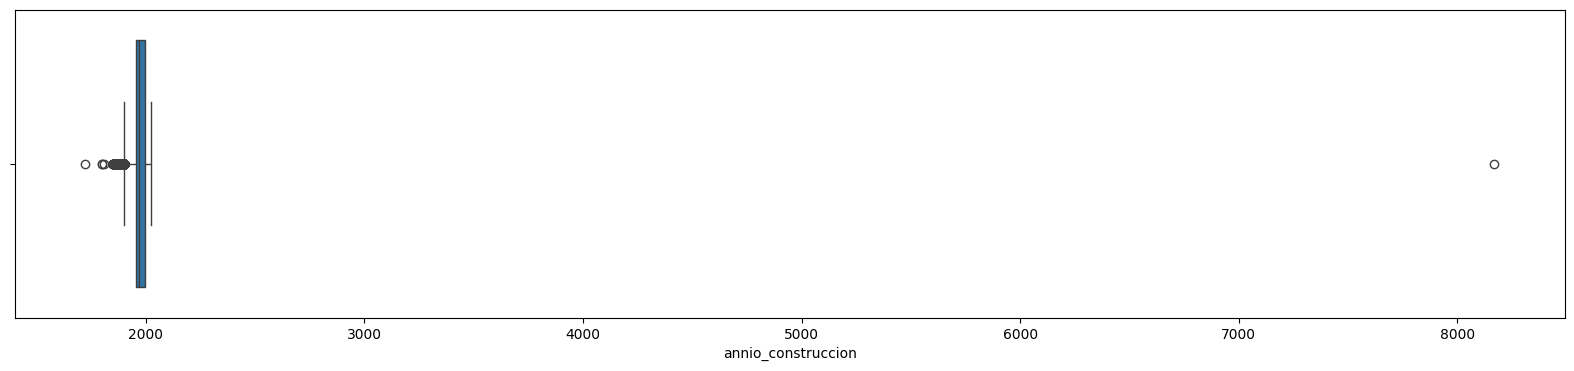

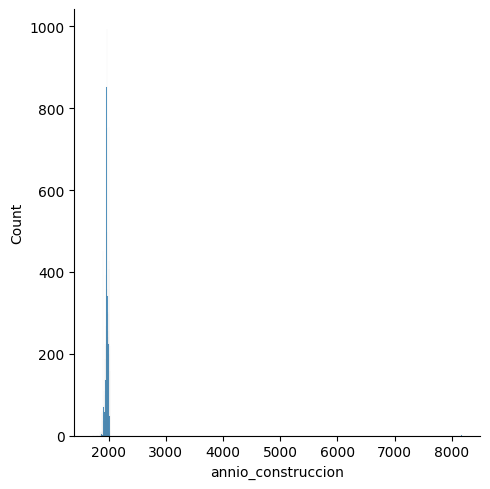

count    10000.000000
mean      1970.046400
std         69.386705
min       1723.000000
25%       1957.000000
50%       1970.000000
75%       1994.000000
max       8170.000000
Name: annio_construccion, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: precio_compra



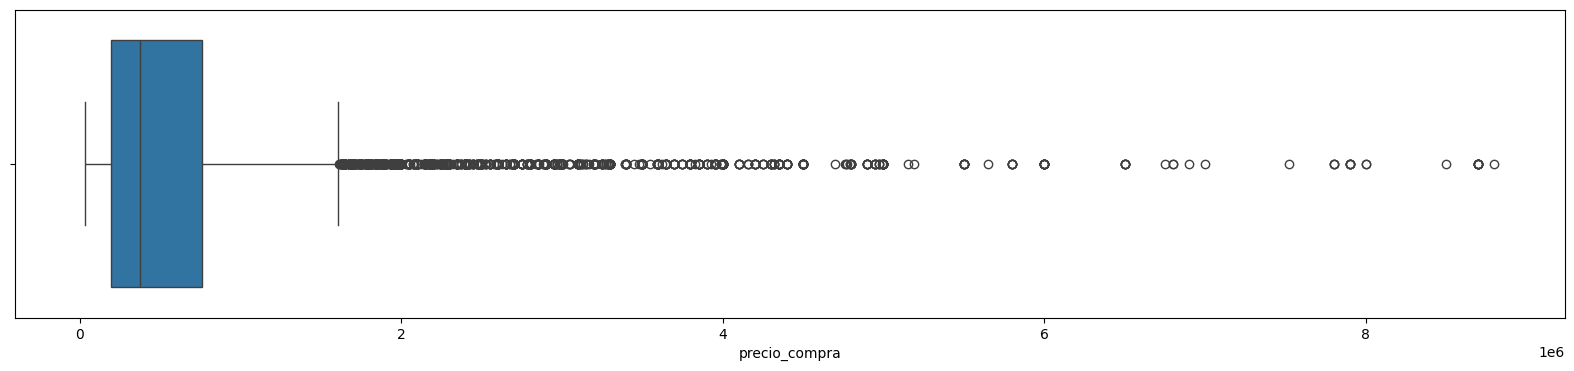

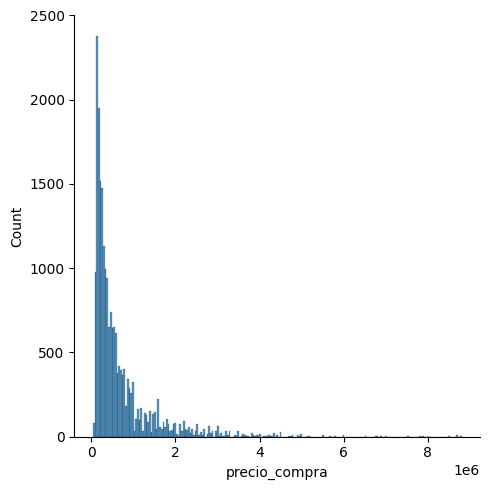

count    2.174200e+04
mean     6.537356e+05
std      7.820821e+05
min      3.600000e+04
25%      1.980000e+05
50%      3.750000e+05
75%      7.636000e+05
max      8.800000e+06
Name: precio_compra, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: precio_compra_por_area



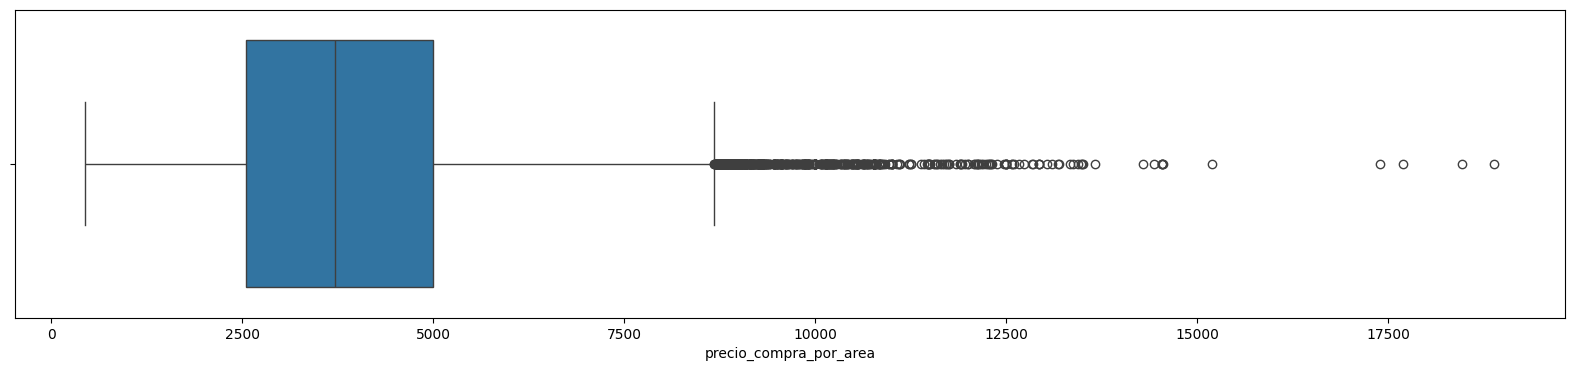

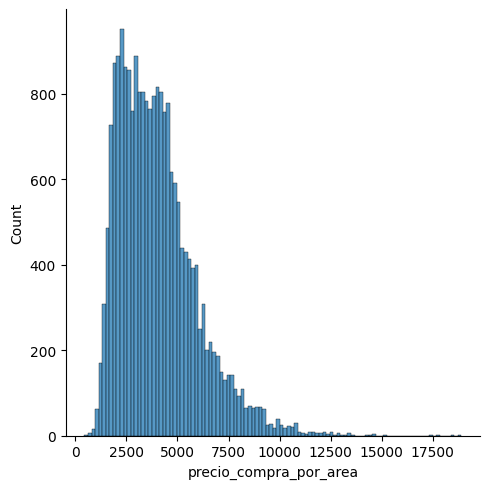

count    21742.000000
mean      4020.523871
std       1908.418774
min        447.000000
25%       2551.000000
50%       3720.000000
75%       5000.000000
max      18889.000000
Name: precio_compra_por_area, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: bannos



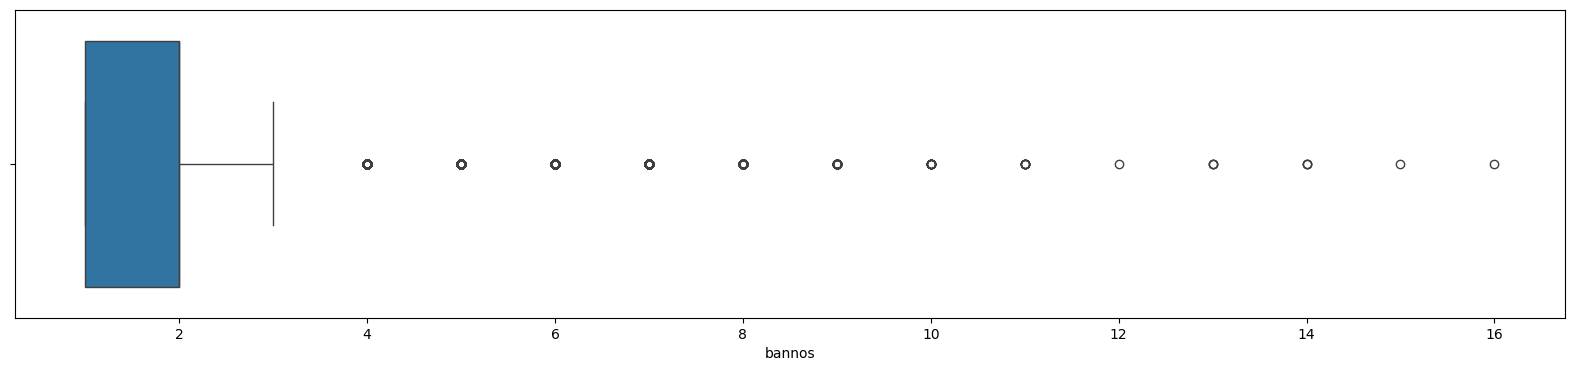

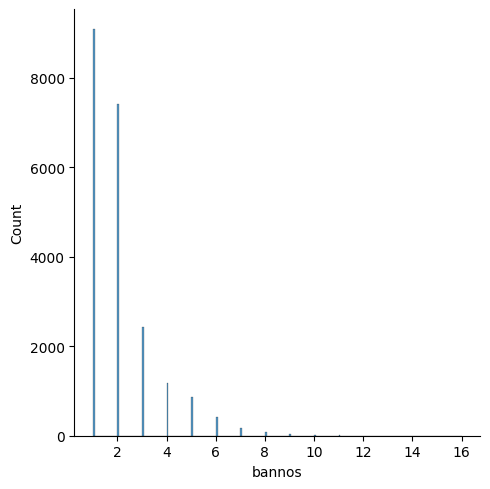

count    21726.000000
mean         2.091687
std          1.406992
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: bannos, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: habitaciones



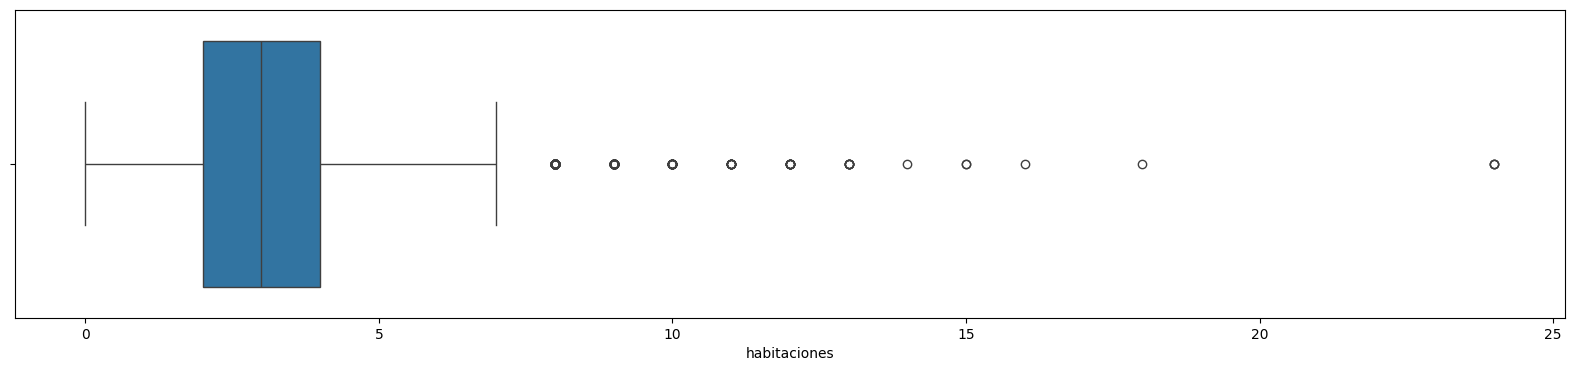

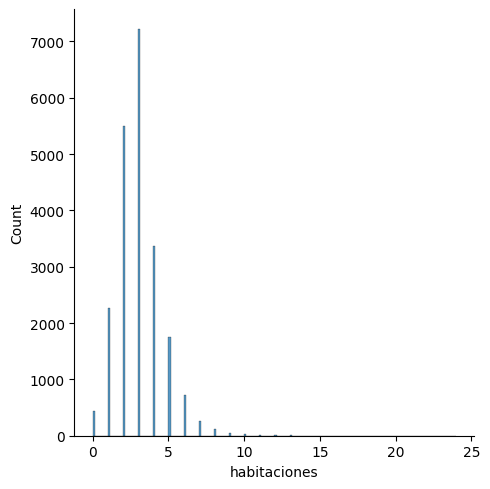

count    21742.000000
mean         3.005749
std          1.510497
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: habitaciones, dtype: float64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: metros_cuadrados



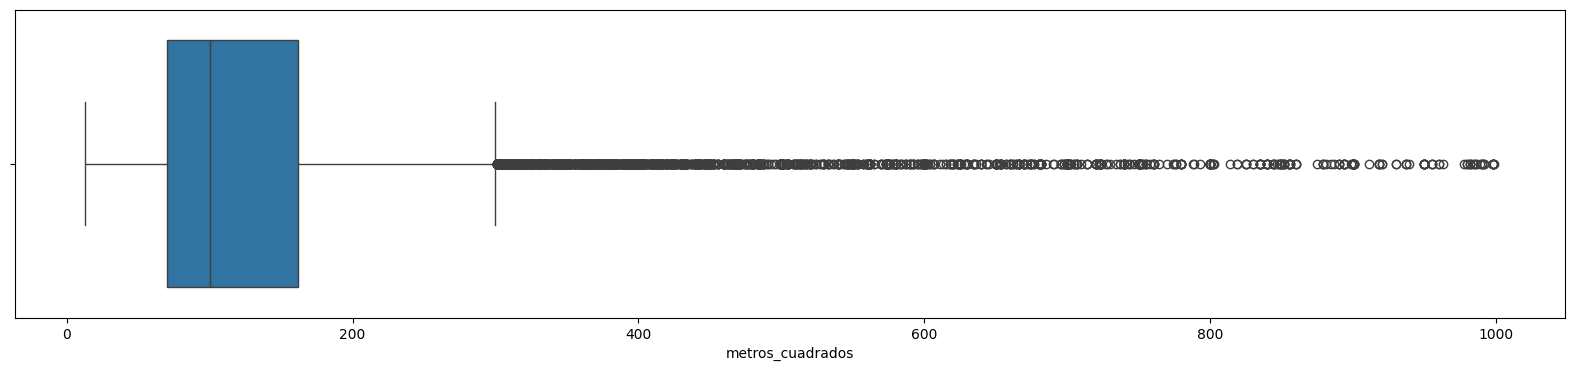

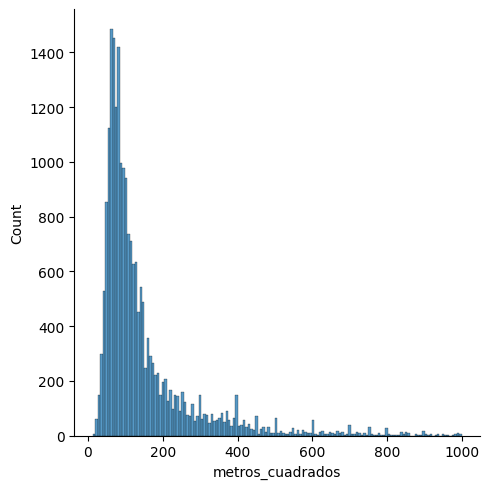

count    21616.000000
mean       146.920892
std        134.181865
min         13.000000
25%         70.000000
50%        100.000000
75%        162.000000
max        999.000000
Name: metros_cuadrados, dtype: float64
----------------------------------------------------------------------------------------------------


In [9]:
graficos_variables_cuant(df_cuant)

##### Variables Cualitativas

In [10]:
df_cual = df.filter(['cee','piso', 'balcon', 
       'armarios_empotrados', 'jardin', 'zonas_verdes',
       'ascensor', 'estacionamiento', 'pileta',
       'trastero', 'terraza', 'tipo_inmueble', 'accesible', 'exterior',
       'bajo', 'orientacion_este', 'orientacion_norte', 'orientacion_sur',
       'orientacion_oeste', 'necesita_reforma'], axis=1)

In [11]:
def graficos_variables_cualit(data):
    ''''Funcuion para graficar las variables cualitativas'''
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(df[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna)
                # ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)
                #se superponen los valores porque me da uns advertencia al aplicar este parametro, no sé como sacarla :)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: cee



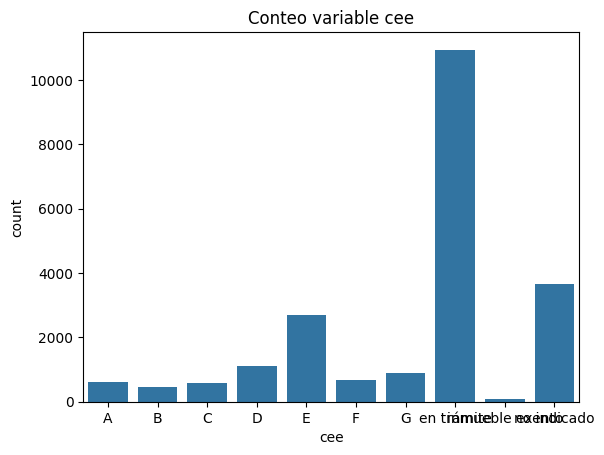

cee
en trámite         10937
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: piso



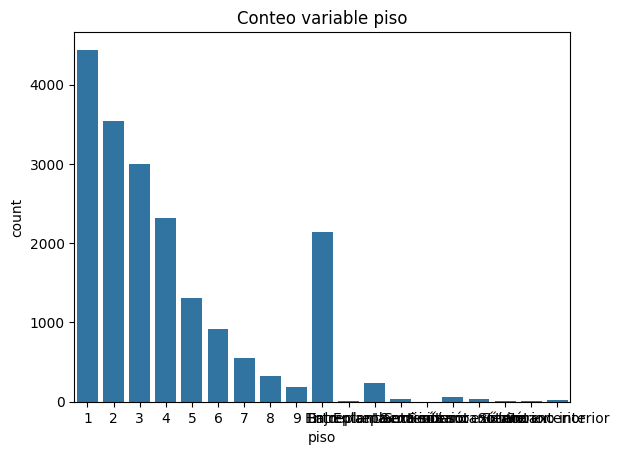

piso
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: balcon

No es necesario graficar porque tiene un solo valor dentro de la columna
balcon
True    3321
Name: count, dtype: int64
-------------------------------------------------------------------------------

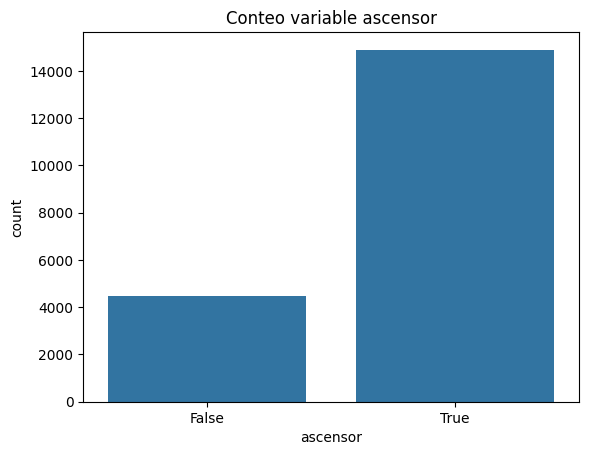

ascensor
True     14895
False     4461
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: estacionamiento



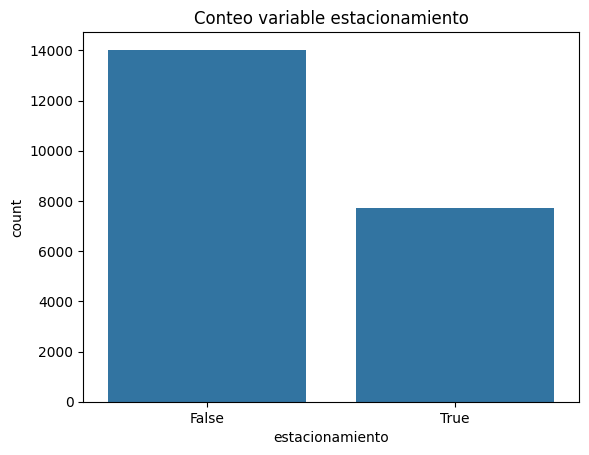

estacionamiento
False    14023
True      7719
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: pileta

No es necesario graficar porque tiene un solo valor dentro de la columna
pileta
True    5171
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: trastero

No es necesario graficar porque tiene un solo valor dentro de la columna
trastero
True    7698
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: terraza

No es necesario graficar 

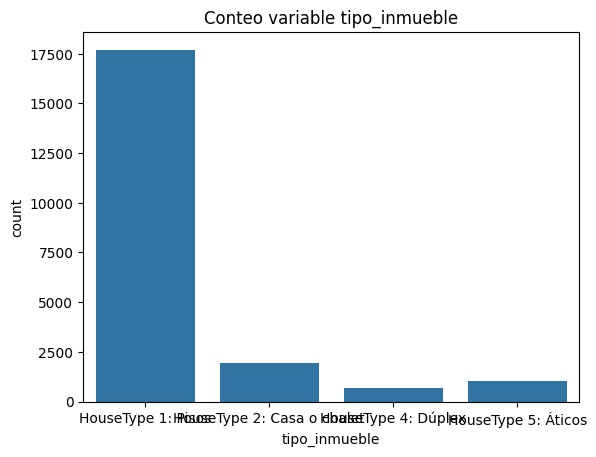

tipo_inmueble
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: accesible

No es necesario graficar porque tiene un solo valor dentro de la columna
accesible
True    4074
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: exterior



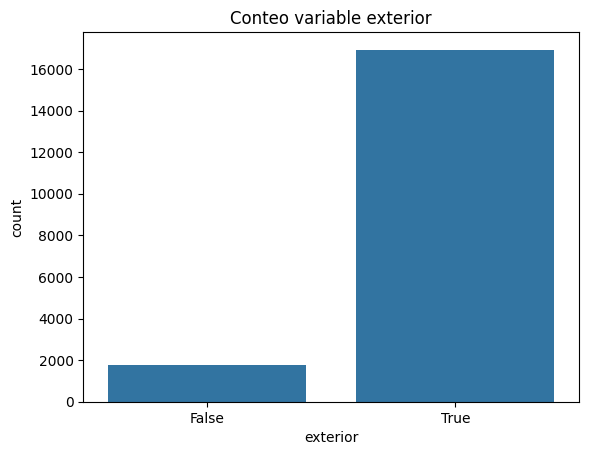

exterior
True     16922
False     1777
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: bajo



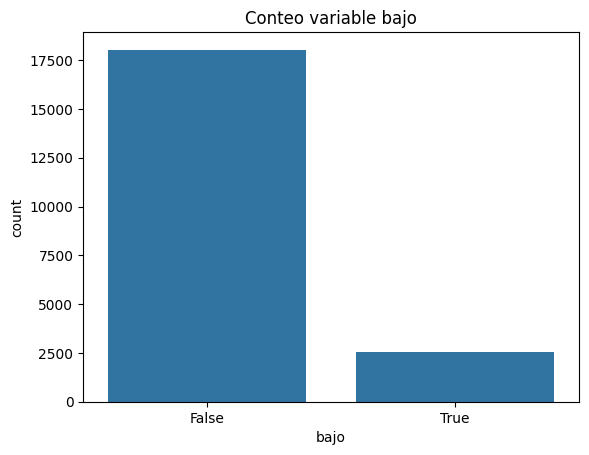

bajo
False    18033
True      2539
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: orientacion_este



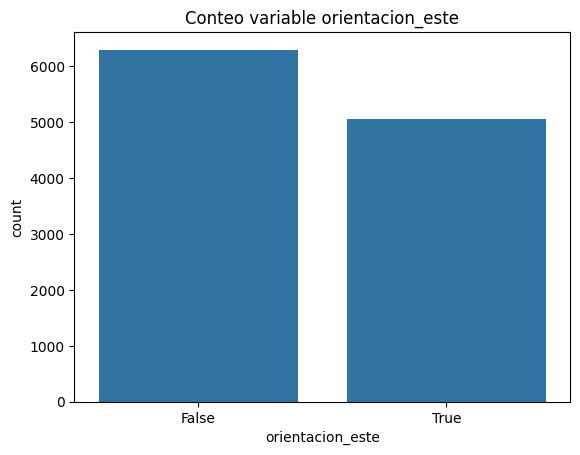

orientacion_este
False    6302
True     5056
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: orientacion_norte



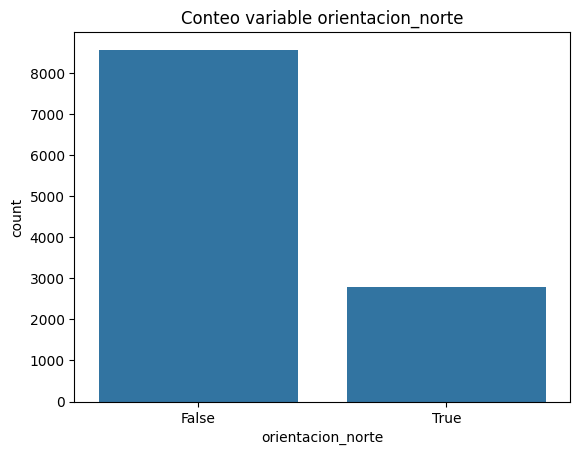

orientacion_norte
False    8567
True     2791
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: orientacion_sur



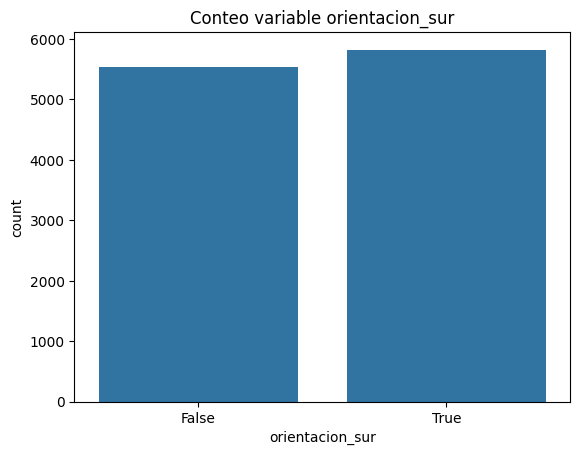

orientacion_sur
True     5823
False    5535
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: orientacion_oeste



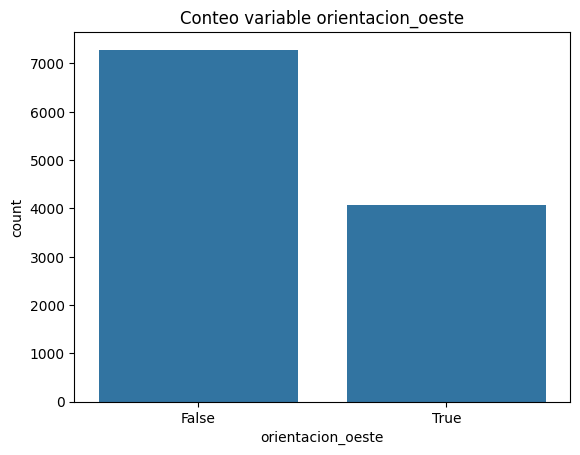

orientacion_oeste
False    7287
True     4071
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: necesita_reforma



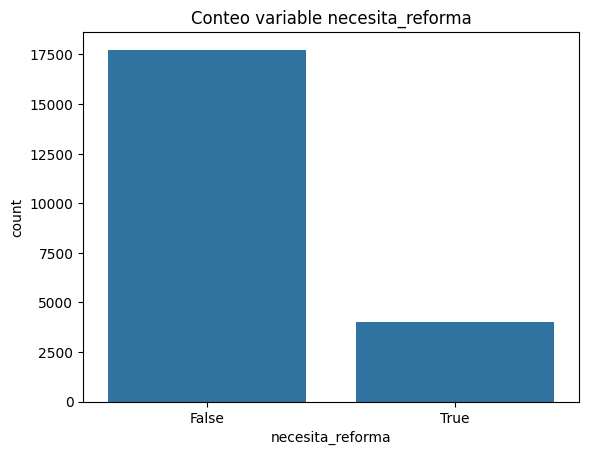

necesita_reforma
False    17747
True      3995
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
None


In [12]:
print(graficos_variables_cualit(df_cual))

In [13]:
def rellenar_columnas_F(data):
    ''' Función que rellena las columnas que tienen valor true y nan'''
    try:
        df['zonas_verdes'].replace(np.nan, False,inplace=True)
        df['balcon'].replace(np.nan, False,inplace=True)
        df['armarios_empotrados'].replace(np.nan, False,inplace=True)
        df['jardin'].replace(np.nan, False,inplace=True)
        df['pileta'].replace(np.nan, False,inplace=True)
        df['trastero'].replace(np.nan, False,inplace=True)
        df['terraza'].replace(np.nan, False,inplace=True)
        df['accesible'].replace(np.nan, False,inplace=True)
    except Exception as a:
        print(f"No pude rellenar las columnas por {a}")
    return data

In [14]:
df = rellenar_columnas_F(df)

In [15]:
def rellenar_annios_nulos_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_antiguos = df[(df['necesita_reforma'] == True) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que necesitan reforma
        dicc_annios_antiguos = dicc_annios_antiguos + [{'ubicacion': 'Horcajo, Madrid', 'annio_construccion': 1957}, 
                   {'ubicacion': 'Valdebebas - Valdefuentes, Madrid', 'annio_construccion': 1957},
                   {'ubicacion': 'Virgen del Cortijo - Manoteras, Madrid', 'annio_construccion': 1957}]
        
        df_annios_antiguos = pd.DataFrame(dicc_annios_antiguos)
        df_unido = pd.merge(df,df_annios_antiguos, on='ubicacion', how = 'left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido['annio_construccion'] = df_unido.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == True) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido.drop(columns=['annio_construccion_y', 'annio_construccion_x'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df


In [16]:
def rellenar_annios_nulos_no_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_nuevo = df[(df['necesita_reforma'] == False) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que no necesitan reforma
        dicc_annios_nuevo = dicc_annios_nuevo + [{'ubicacion': 'Cuatro Vientos, Madrid', 'annio_construccion': 1973}]
        
        df_annios_nuevo = pd.DataFrame(dicc_annios_nuevo)
        df_unido_nuevo = pd.merge(df,df_annios_nuevo, on='ubicacion', how='left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido_nuevo['annio_construccion'] = df_unido_nuevo.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == False) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido_nuevo.drop(columns=['annio_construccion_x', 'annio_construccion_y'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df

In [17]:
df[df['annio_construccion'] == df['annio_construccion'].max()]

,annio_construccion,precio_compra,precio_compra_por_area,cee,piso,balcon,armarios_empotrados,jardin,zonas_verdes,ascensor,...,orientacion_norte,orientacion_sur,orientacion_oeste,necesita_reforma,bannos,habitaciones,barrio_id,metros_cuadrados,ubicacion,anuncio
19235,8170.0,745000,8278,en trámite,5,False,True,False,False,True,...,NaN,NaN,NaN,False,1.0,3,Neighborhood 99: Goya (5887.64 €/m2) - Distric...,90.0,"Barrio de Salamanca, Madrid",Piso en venta en Goya


In [18]:
media_año_barrio_s = df[(df['ubicacion'] == 'Barrio de Salamanca, Madrid') & (df['annio_construccion'].notna())].groupby('ubicacion')['annio_construccion'].mean(numeric_only = True).astype(int)
media_año_barrio_s

ubicacion
Barrio de Salamanca, Madrid    1979
Name: annio_construccion, dtype: int32

In [19]:
df['annio_construccion'].replace(8170.0, 1979, inplace= True)

In [20]:
df = rellenar_annios_nulos_necesitan_reforma(df)
df = rellenar_annios_nulos_no_necesitan_reforma(df)

In [21]:
def rellenar_pisos_nulos(df):
    '''Funcion para rellenar los valores nulos de los pisos, con la moda segun la ubicacion'''
    try:
        #df el piso que más se repite, respetando las alturas por ubicacion segun normativa
        df_piso_más_comun = df[df['piso'].notna()].groupby(['ubicacion', 'piso'], as_index=False).count()[['ubicacion', 'piso']].groupby('ubicacion', as_index=False).max()

        df_unido_pisos = pd.merge(df,df_piso_más_comun, on='ubicacion', how= 'inner')

        df_unido_pisos['piso'] = df_unido_pisos.apply(lambda x: x.piso_y if pd.isna(x.piso_x) else x.piso_x, axis = 1)

        df = df_unido_pisos.drop(columns=['piso_x', 'piso_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [22]:
df = rellenar_pisos_nulos(df)

In [23]:
def rellenar_bajos_nulos(df):
    '''Funcion que rellena los valores nulos en la columna bajo en base al piso en el que se encuentra'''
    try:
        bajos = ('Semi-sótano', 'Entreplanta interior', 'Entreplanta', 'Semi-sótano exterior', 'Semi-sótano interior', 'Sótano interior', 'Sótano', 'Sótano exterior')

        df['bajo'] = df['piso'].apply(lambda x: True if x in bajos else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [24]:
df = rellenar_bajos_nulos(df)

In [25]:
def sacar_metros_cuadrados_nuevos(df):
    ''''Funcion para rellenar los valores nulos de los metros cuadrados en base a el precio por metro cuadrado'''
    try:
        df.drop(columns=['metros_cuadrados'], axis= 1, inplace=True)
        df['metros_cuadrados'] = (df['precio_compra'] / df['precio_compra_por_area']).round()
    except Exception as a:
        print(f"No pude tranformar el dataframe")
    return df
    

In [26]:
df = sacar_metros_cuadrados_nuevos(df)

In [27]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f} %")

La cardinalidad de la variable cee es 0.05 %
La cardinalidad de la variable ascensor es 0.01 %
La cardinalidad de la variable tipo_inmueble es 0.02 %
La cardinalidad de la variable exterior es 0.01 %
La cardinalidad de la variable orientacion_este es 0.01 %
La cardinalidad de la variable orientacion_norte es 0.01 %
La cardinalidad de la variable orientacion_sur es 0.01 %
La cardinalidad de la variable orientacion_oeste es 0.01 %
La cardinalidad de la variable barrio_id es 0.58 %
La cardinalidad de la variable ubicacion es 0.67 %
La cardinalidad de la variable anuncio es 49.38 %
La cardinalidad de la variable piso es 0.09 %


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio_compra           21742 non-null  int64  
 1   precio_compra_por_area  21742 non-null  int64  
 2   cee                     21742 non-null  object 
 3   balcon                  21742 non-null  bool   
 4   armarios_empotrados     21742 non-null  bool   
 5   jardin                  21742 non-null  bool   
 6   zonas_verdes            21742 non-null  bool   
 7   ascensor                19356 non-null  object 
 8   estacionamiento         21742 non-null  bool   
 9   pileta                  21742 non-null  bool   
 10  trastero                21742 non-null  bool   
 11  terraza                 21742 non-null  bool   
 12  tipo_inmueble           21351 non-null  object 
 13  id                      21742 non-null  int64  
 14  accesible               21742 non-null